# EXAM SURVEILLANCE SYSTEM

1 PROBLEM STATEMENT:

Online exams have become a major part in education system and also there has been a rapid growth in number of cases of students cheating in their examinations.
Which brought an requirement of Artificially Intelligent Examiner to monitor each and every student. Because an examiner might face difficulty in monitoring students virtually.
An Intelligent program can do the task.So we came up with a solution of an “Student Surveillance System” which automatically monitors the candidate’s exam throughout, without the need of an actual human proctor and detects any instances of mal-practices such as the student looking away from the screen, the student using a mobile phone or any other gadget, appearance of any other person other than the student in the room, any other person helping the student by telling him the answers without appearing in the webcam etc.


## FACE RECOGNITION

In [3]:
#!pip install face-recognitionq

In [2]:
import sys
print(sys.version)


3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


## Stage -1

In [2]:
import warnings 
warnings.simplefilter('ignore')
import cv2

import numpy as np
import face_recognition
import tkinter as tk
import os
from datetime import datetime

from tkinter import *

from tkinter import messagebox as mb
import json

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time
import cv2
import numpy as np
import face_recognition
import os

def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.imread(img)
        imgs = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faceLocations = face_recognition.face_locations(imgs)

        if len(faceLocations) > 0:
            encode = face_recognition.face_encodings(imgs, faceLocations)[0]
            encodeList.append(encode)

    return encodeList


# Load images of known faces and their corresponding class names
# images = [cv2.imread('D:\\Walls\\DSC_0150.jpg'),
#           cv2.imread('D:\\Study\\Data Science\\24. CV\\image_examples\\object.jpg')]  # Replace with actual image paths
images = [] # create an empty list to store the loaded images
folder_path = "D:\\Walls\\faces"

# loop through all files in the folder
for filename in os.listdir(folder_path):
    # check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # open the image using Pillow library and add it to the list
        img_path = os.path.join(folder_path, filename)
        # img = Image.open(img_path)
        images.append(img_path)

encodeListKnown = findEncodings(images)

print('Encoding Complete')


def recognize():
    cap = cv2.VideoCapture(0)

    while True:
        success, img = cap.read()

        imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)
        imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

        facesCurFrame = face_recognition.face_locations(imgS)
        encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

        for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
            matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
            faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
            matchIndex = np.argmin(faceDis)

            name = "Failed Authentication"
            color = (0, 0, 255)

            if matches[matchIndex]:
                name = "Successful"
                color = (0, 255, 0)

            y1, x2, y2, x1 = faceLoc
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), color, cv2.FILLED)
            cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            cv2.imshow('img', img)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cap.release()


recognize()


Encoding Complete


## stage 2 *registration process*

In [3]:
# register and login window with tkinter module overwrite final
import tkinter as tk
import cv2
import face_recognition
from tkinter import messagebox as mb

def register():
    # Open camera
    cap = cv2.VideoCapture(0)

    # Capture image
    while True:
        ret, frame = cap.read()
        cv2.imshow('Registration', frame)

        # Press 'q' to capture the image
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.imwrite('registration_image.jpg', frame)
            break

    print("Registration Successful")
    mb.showinfo("Status","Registration Successful")

    # Release the camera
    cap.release()
    cv2.destroyAllWindows()

def login():
    # Load registered user image
    registered_image = face_recognition.load_image_file('registration_image.jpg')
    registered_image_encoding = face_recognition.face_encodings(registered_image)[0]

    # Open camera
    cap = cv2.VideoCapture(0)

    # Capture image
    while True:
        ret, frame = cap.read()
        cv2.imshow('Login', frame)

        # Press 'q' to capture the image
        if cv2.waitKey(1) & 0xFF == ord('q'):
            # Encode captured image
            face_encoding = face_recognition.face_encodings(frame)

            if len(face_encoding) > 0:
                # Compare with registered user image
                match = face_recognition.compare_faces([registered_image_encoding], face_encoding[0])

                if match[0]:
                    print("Authentication Successful")
                    mb.showinfo("Status","Authentication Successful")
                else:
                    print("Invalid User")
                    mb.showerror("Status","Invalid User")

            break

    # Release the camera
    cap.release()
    cv2.destroyAllWindows()

# Main program
from tkinter import *

def register_callback():
    register()

def login_callback():
    login()

# Create GUI window
window = Tk()
window.geometry("400x200")
window.title("Face Authentication")
l=tk.Label(text ='Face Authentication',font=('Arial', 18, 'bold'), bg='orange', fg='white')
l.place(x=70,y=10)

# Register Button
register_button = Button(window, text="Register",font=('Ariel',18,'bold'),bg='orange',fg='white', command=register_callback)
register_button.pack(pady=20)
register_button.place(x=46,y=85)

# Login Button
login_button = Button(window, text="Login",font=('Ariel',18,'bold'),bg='orange',fg='white', command=login_callback)
login_button.pack(pady=10)
login_button.place(x=240,y=85)

# Start GUI main loop
window.config(bg='yellow')
window.mainloop()

Authentication Successful


## stage 3 input questions 

In [3]:
#working fine

# DISPLAYING QUESTIONS
import json

DATA = {}
DATA["Questions"] = []
DATA["Options"] = []
DATA["Answers"] = []

def Test():
    yes = int(input("Do you want to create a new test? Enter 1 for yes: "))

    if yes != 1:
        print("Test closed.")
        return None

    n = int(input("Enter the number of questions: "))

    for i in range(n):
        question = input("Enter the question: ")
        options = []
        for j in range(4):
            option = input("Enter option: ")
            options.append(option)
        answer = int(input("Enter the answer (1-4): "))

        DATA["Questions"].append(question)
        DATA["Options"].append(options)
        DATA["Answers"].append(answer)

    return n

number_of_q = Test()

if number_of_q is not None:
    def Test_Start():
        for i in range(number_of_q):
            print(DATA["Questions"][i])
            for j, option in enumerate(DATA["Options"][i]):
                print(f"Option {j+1}): {option}")
            print()

    Test_Start()

with open("EXAM_DATA.json", "w") as f:
    json.dump(DATA, f)

print("Exam data saved to EXAM_DATA.json.")


# STARTING THE TEST

from tkinter import *
from tkinter import messagebox as mb
import json

class Quiz:
    def __init__(self, gui, question, options, answer):
        self.gui = gui
        self.q_no = 0
        self.question = question
        self.options = options
        self.answer = answer
        self.data_size = len(question)
        self.correct = 0

        self.display_title()
        self.display_question()
        self.opt_selected = IntVar()
        self.opts = self.radio_buttons()
        self.display_options()
        self.buttons()

    def display_result(self):
        wrong_count = self.data_size - self.correct
        correct = f"Correct: {self.correct}"
        wrong = f"Wrong: {wrong_count}"
        score = int(self.correct / self.data_size * 100)
        result = f"Score: {score}%"
        mb.showinfo("Result", f"{result}\n{correct}\n{wrong}")

    def check_ans(self):
        if self.opt_selected.get() == self.answer[self.q_no]:
            return True

    def next_btn(self):
        if self.check_ans():
            self.correct += 1
        self.q_no += 1

        if self.q_no == self.data_size:
            self.display_result()
            self.gui.destroy()
        else:
            self.display_question()
            self.display_options()

    def buttons(self):
        next_button = Button(
            self.gui,
            text="Next",
            command=self.next_btn,
            width=10,
            bg="blue",
            fg="white",
            font=("ariel", 16, "bold")
        )
        next_button.place(x=350, y=380)

        quit_button = Button(
            self.gui,
            text="Quit",
            command=self.gui.destroy,
            width=5,
            bg="black",
            fg="white",
            font=("ariel", 16, "bold")
        )
        quit_button.place(x=700, y=50)

    def display_options(self):
        val = 0
        self.opt_selected.set(0)

        for option in self.options[self.q_no]:
            self.opts[val]['text'] = option
            val += 1

    def display_question(self):
        q_no = Label(
            self.gui,
            text=self.question[self.q_no],
            width=60,
            bg='aqua',
            font=('ariel', 20, 'bold'),
            anchor='w'
        )
        q_no.place(x=70, y=100)

    def display_title(self):
        title = Label(
            self.gui,
            text="INTELLIGENT PROCTOR",
            width=50,
            bg="Red",
            fg="white",
            font=("ariel", 20, "bold")
        )
        title.place(x=0, y=2)

    def radio_buttons(self):
        q_list = []
        y_pos = 150

        while len(q_list) < 4:
            radio_btn = Radiobutton(
                self.gui,
                text=" ",
                bg='aqua',
                variable=self.opt_selected,
                value=len(q_list) + 1,
                font=("ariel", 18)
            )
            q_list.append(radio_btn)
            radio_btn.place(x=100, y=y_pos)
            y_pos += 40

        return q_list

gui = Tk()
gui.geometry("800x450")
gui.title("MCQ")
gui.config(bg='aqua')

with open('EXAM_DATA.json') as f:
    data = json.load(f)
    question = data['Questions']
    options = data['Options']
    answer = data['Answers']
    quiz = Quiz(gui, question, options, answer)
    gui.mainloop()


Do you want to create a new test? Enter 1 for yes: 1
Enter the number of questions: 1
Enter the question: what is your name
Enter option: deep
Enter option: sameer
Enter option: 
  @media print {
    .ms-editor-squiggles-container {
      display:none !important;
    }
  }
  .ms-editor-squiggles-container {
    all: initial;
  }mr perfect
Enter option: Dharmendra 
Enter the answer (1-4): 3
what is your name
Option 1): deep
Option 2): sameer
Option 3): mr perfect
Option 4): Dharmendra 

Exam data saved to EXAM_DATA.json.


## Object detection

## Stage 4

In [4]:
# object detection and generate warning and capture image 
# code run fine

import warnings
import cv2
import numpy as np
import os
import time

# Load the pre-trained YOLO weights and configuration
net = cv2.dnn.readNetFromDarknet("D:\\Codebook\\exam\\yolofile\\yolov3.cfg",
                                     "D:\\Codebook\\exam\\yolofile\\yolov3.weights")

# Load the COCO class labels
with open('D:\\Codebook\\exam\\yolofile\\coco.names', 'r') as f:
    classes = f.read().splitlines()

# Set the input image size for YOLO
input_size = (416, 416)

# Open the video capture
capture = cv2.VideoCapture(0)

# Create a directory to save the captured images
output_dir = 'D:\\Codebook\\exam\\captured_images'
os.makedirs(output_dir, exist_ok=True)

# Set the initial time
start_time = time.time()

while True:
    # Read the frame from the video capture
    ret, frame = capture.read()

    if not ret:
        break

    # Create a blob from the input frame and set it as the input for the neural network
    blob = cv2.dnn.blobFromImage(frame, 1/255.0, input_size, swapRB=True, crop=False)
    net.setInput(blob)

    # Run the forward pass to get the YOLO output
    output_layers_names = net.getUnconnectedOutLayersNames()
    layer_outputs = net.forward(output_layers_names)

    # Process the YOLO output
    boxes = []
    confidences = []
    class_ids = []

    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Set a confidence threshold
                center_x = int(detection[0] * frame.shape[1])
                center_y = int(detection[1] * frame.shape[0])
                width = int(detection[2] * frame.shape[1])
                height = int(detection[3] * frame.shape[0])
                left = int(center_x - width/2)
                top = int(center_y - height/2)

                boxes.append([left, top, width, height])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-maximum suppression to remove redundant overlapping boxes
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw the bounding boxes and labels on the frame
    if len(indices) > 0:
        for i in indices.flatten():
            x, y, w, h = boxes[i]
            label = classes[class_ids[i]]
            confidence = confidences[i]

            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, f'{label}: {confidence:.2f}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            if label == 'cell phone':
                # Display warning message when a phone is detected
                cv2.putText(frame, 'Warning: Phone Detected', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

                # Check if 05 seconds have elapsed since the last image capture
                current_time = time.time()
                elapsed_time = current_time - start_time
                if elapsed_time >= 5:
                    # Save the captured image to the output directory
                    image_name = f'captured_image_{str(len(os.listdir(output_dir)) + 1)}.jpg'
                    image_path = os.path.join(output_dir, image_name)
                    cv2.imwrite(image_path, frame)
                    start_time = current_time  # Update the start time

    # Display the output frame
    cv2.imshow('YOLO Object Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
capture.release()
cv2.destroyAllWindows()


## Stage 5

## EYE DETECTION


In [5]:
import cv2
import numpy as np
import os

# Load the pre-trained Haar cascade classifiers for face and eye detection
face_classifier = cv2.CascadeClassifier('D:\\Study\\Data Science\\24. CV\\Haarcascades\\haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('D:/Study/Data Science/24. CV/Haarcascades/haarcascade_eye.xml')

# Create the "captured_images" folder if it doesn't exist
output_dir = 'C://Users//deepp//Downloads//captured_images'
os.makedirs(output_dir, exist_ok=True)

# Initialize the video capture
capture = cv2.VideoCapture(0)

while True:
    ret, frame = capture.read()

    if not ret:
        print("Failed to capture frame from the camera.")
        break

    # Convert the frame to grayscale for face and eye detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Region of Interest (ROI) for face detection
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_classifier.detectMultiScale(roi_gray)

        if len(eyes) == 0:
            # No eyes detected, display a warning message
            cv2.putText(frame, 'Warning: Eyes not detected', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

            # Capture and save the image without eyes
            file_name = os.path.join(output_dir, 'no_eyes.jpg')
            cv2.imwrite(file_name, frame)

        # Draw rectangles around the detected eyes
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Face and Eye Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and destroy all windows
capture.release()
cv2.destroyAllWindows()


## stage 6


## MOTION DETECTION


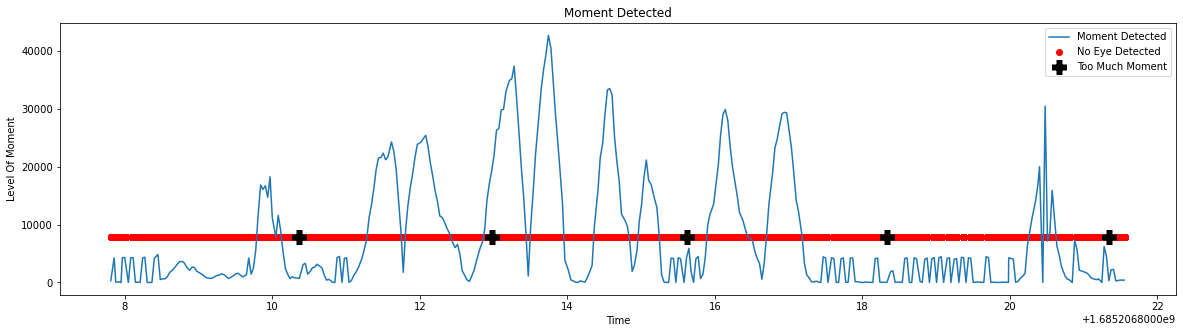

In [6]:
# motion detection code run fine
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import time
import datetime
import math

eye = cv2.CascadeClassifier('D:\\Study\\Data Science\\24. CV\\Haarcascades\\haarcascade_eye.xml')
moment = 0
accc = []
timee = []
eyee = []
dont = []
cap = cv2.VideoCapture(0)
if cap.isOpened():
    ret, frame = cap.read()
else:
    ret = False

ret, frame1 = cap.read()
ret, frame2 = cap.read()

while ret:
    d = cv2.absdiff(frame2, frame1)
    gray = cv2.cvtColor(d, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    ret, th = cv2.threshold(blur, 50, 250, cv2.THRESH_BINARY)
    dilated = cv2.dilate(th, np.ones((1, 1), np.uint8), iterations=3)
    frame1 = frame2
    ret, frame2 = cap.read()

    cv2.imshow('blur', dilated)
    avg = np.count_nonzero(dilated)
    cv2.imshow('frame2', frame2)
    ts = time.time()
    timee.append(ts)
    accc.append(avg)
    
    if avg > 0.5:
        moment = moment + 1
        if moment > 75:
            cv2.putText(frame2, 'Dont look around!', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            dont.append(time.time())
            moment = 0
 
        eyes = eye.detectMultiScale(frame2, 1.5, 7)
        for x, y, w, h in eyes:
            cv2.rectangle(frame2, (x, y), (x+w, y+h), (0, 0, 255), 2)
 
        if eyes == ():
            for i in range(10):
                cv2.putText(frame2, 'YOU ARE UNDER SURVEILLANCE.!!!', (50, 300), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                eyee.append(time.time())
 
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cv2.destroyAllWindows()
cap.release()
avg = np.average(accc)
s = len(eyee)
avg_d = [avg for i in range(4420)]
moment_d = list(zip(eyee, avg_d))
dontt = list(zip(dont, avg_d))
moment_x = []
moment_y = []
for x, y in moment_d:
    moment_x.append(x)
    moment_y.append(y)

dont_x = []
dont_y = []
for x, y in dontt:
    dont_x.append(x)
    dont_y.append(y)

fig = plt.figure(figsize=(10, 5))
fig.set_figwidth(20)
fig.set_figheight(5)

plt.plot(timee, accc)
plt.xlabel("Time")
plt.ylabel("Level Of Moment")
plt.title("Moment Detected")
plt.scatter(moment_x, moment_y, color='red')
plt.scatter(dont_x, dont_y, color='black', marker='+', linewidths=15)
plt.legend(['Moment Detected', 'No Eye Detected', 'Too Much Moment'])
plt.show()
